### Requirements

In [344]:
# pip install matplotlib

# Preprocessing teams

### Import

In [345]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Fixed variables

In [346]:
# Dictionary of team codes
teams_dict = {
    'ATL': 'Atlanta_Hawks',
    'BOS': 'Boston_Celtics', 
    'BKN': 'Brooklyn_Nets', 
    'CHA': 'Charlotte_Hornets', 
    'CHI': 'Chicago_Bulls', 
    'CLE': 'Cleveland_Cavaliers', 
    'DAL': 'Dallas_Mavericks', 
    'DEN': 'Denver_Nuggets', 
    'DET': 'Detroit_Pistons', 
    'GSW': 'Golden_State_Warriors',
    'HOU': 'Houston_Rockets',
    'IND': 'Indiana_Pacers',
    'LAC': 'Los_Angeles_Clippers',
    'LAL': 'Los_Angeles_Lakers',
    'MEM': 'Memphis_Grizzlies',
    'MIA': 'Miami_Heat',
    'MIL': 'Milwaukee_Bucks',
    'MIN': 'Minnesota_Timberwolves',
    'NOP': 'New_Orleans_Pelicans',
    'NYK': 'New_York_Knicks',
    'OKC': 'Oklahoma_City_Thunder',
    'ORL': 'Orlando_Magic',
    'PHI': 'Philadelphia_76ers',
    'PHX': 'Phoenix_Suns',
    'POR': 'Portland_Trail_Blazers',
    'SAC': 'Sacramento_Kings',
    'SAS': 'San_Antonio_Spurs',
    'TOR': 'Toronto_Raptors',
    'UTA': 'Utah_Jazz',
    'WAS': 'Washington_Wizards',
}

print(len(teams_dict))

# List of original team codes
teams = ['MIA', 'TOR', 'NYK', 'TOT', 'OKC', 'NOP', 'MEM', 'HOU', 'UTA', 'DEN', 'MIN', 'MIL',
 'PHX', 'BKN', 'CLE', 'SAS', 'GSW', 'ORL', 'WAS', 'POR', 'SAC', 'DET', 'CHA', 'LAL', 
 'CHI', 'PHI', 'LAC', 'BOS', 'ATL', 'DAL', 'IND', 'NOH', 'SEA', 'NJN', 'NOK']

PHX = {'PHO': 'Phoenix_Suns'}
BKN = {'BRK': 'Brooklyn_Nets'}
CHA = {'CHO': 'Charlotte_Hornets'}
NOH = {'NOP': 'New_Orleans_Pelicans'}
SEA = {}
NJN = {}
NOK = {}

print(len(teams))

# Dictionary of header names
headers = {
    'PLAYER_ID': 'Player_ID',
    'SEASON_ID': 'Season',
    'LEAGUE_ID': 'League_ID',
    'TEAM_ID': 'Team_ID',
    'TEAM_ABBREVIATION': 'Team',
    'PLAYER_AGE': 'Player_Age',
    'GP': 'Games_Played',
    'GS': 'Games_Started', 
    'MIN': 'Minutes_Played',
    'FGM': 'Field_Goals',
    'FGA': 'Field_Goals_Attempts',
    'FG_PCT': 'Field_Goals_Percentage',
    'FG3M': '3_Pointers',
    'FG3A': '3_Pointers_Attempts',
    'FG3_PCT': '3_Pointers_Percentage',
    'FTM': 'Free_Throws',
    'FTA': 'Free_Throws_Attempts',
    'FT_PCT': 'Free_Throws_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal_Fouls',
    'PTS': 'Points',
    'PlayerName': 'Player_Name'
}

30
35


### Load csv into pandas dataframe

In [347]:
# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Join data file path
data_file_path = os.path.join(parent_dir, 'data')

# Get a list of all ifc files from ifc file path
all_files = [f for f in os.listdir(data_file_path) if f.endswith('.csv') and f.startswith('nba_player_log')]
print(f"All data files: {all_files}")

# Initialize list to store DataFrames
dfs = []

# Read all CSV files into DataFrames
for csv_file in all_files:
    # Construct the full file path
    full_path = os.path.join(data_file_path, csv_file)
    # Read each CSV file using the full path
    df = pd.read_csv(full_path)
    # Append DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
nba_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(f'nba_df shape: {nba_df.shape}')
# print(f'nba_df: {nba_df.info()}')
print(f'columns: {nba_df.columns}')

print(f'Amount of players: {nba_df["PLAYER_ID"].nunique()}')
print(nba_df['TEAM_ABBREVIATION'].unique())

All data files: ['nba_player_log.csv']
nba_df shape: (3369, 28)
columns: Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PlayerName'],
      dtype='object')
Amount of players: 533
['MIA' 'TOR' 'NYK' 'TOT' 'OKC' 'NOP' 'MEM' 'HOU' 'UTA' 'DEN' 'MIN' 'MIL'
 'PHX' 'BKN' 'CLE' 'SAS' 'GSW' 'ORL' 'WAS' 'POR' 'SAC' 'DET' 'CHA' 'LAL'
 'CHI' 'PHI' 'LAC' 'BOS' 'ATL' 'DAL' 'IND' 'NOH' 'SEA' 'NJN' 'NOK']


### Adjust header and values

In [348]:
# Rename header
nba_df = nba_df.rename(columns=headers)

# Get the index of teams_dict
team_index = {team: index for index, team in enumerate(teams_dict)}

# Map 'Team' columns using the index of teams_dict
nba_df['Team'] = nba_df['Team'].map(team_index)

# Remove rows where the 'Team' column is NaN
nba_df = nba_df.dropna(subset=['Team'])

# Downcast 'Team' to integer type
nba_df['Team'] = pd.to_numeric(nba_df['Team'], downcast='integer', errors='coerce')
# nba_df['Team'] = nba_df['Team'].apply(lambda x: int(x))
print(nba_df['Team'].dtype)

# Drop the 'League_ID' column
nba_df = nba_df.drop(columns=['League_ID'])

# Round season up to have only one year
nba_df['Season'] = nba_df['Season'].apply(lambda x: 2000 + int(x.split('-')[1]))

int8


### Preprocess for datetime feature engineering

In [349]:
# Find minimum and maximum season
min_season = nba_df['Season'].min()
max_season = nba_df['Season'].max()

# Slight decrement to ensure to don't end up with 1
scaling_max_season = max_season + (max_season - min_season) * 0.01  # Add 1% buffer

# Map dates to range 0 to 1
nba_df['Time_Scale'] = (nba_df['Season'] - min_season) / (scaling_max_season - min_season)

### Check missing values

In [350]:
# Calculate the number of missing values in each column
missing_values = nba_df.isnull().sum()

# Filter to only show columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Plot datetime

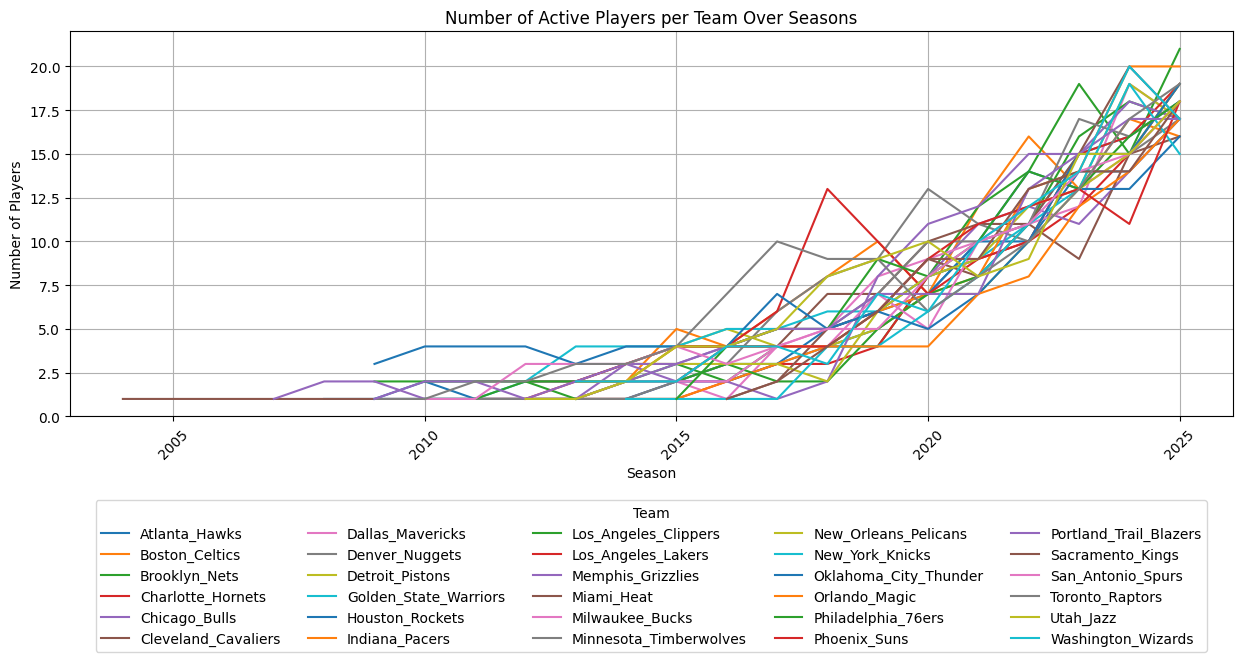

In [351]:
# Group by Date and Team to calculate the mean Win_Loss
player_count = nba_df.groupby(['Season', 'Team'])['Player_ID'].nunique().unstack()

# Plotting the result
fig, ax = plt.subplots(figsize=(15, 5))
player_count.plot(ax=ax)
ax.set(
    title="Number of Active Players per Team Over Seasons",
    xlabel="Season",
    ylabel="Number of Players",
)

# Obtain current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Map the team indices to the full team names
team_fullnames = {str(i): team for i, team in enumerate(teams_dict.values())}

# Map the codes to full team names
mapped_labels = [team_fullnames[label] for label in labels] 

# Adjust ncol for your number of teams
plt.legend(handles=handles, labels=mapped_labels, title='Team', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

ax.grid(True)
plt.xticks(rotation=45)
plt.show()

### Overview

In [352]:
nba_df

,Player_ID,Season,Team_ID,Team,Player_Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempts,...,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Player_Name,Time_Scale
0,1630173,2021,1610612748,15,21.0,61,4,737.0,124,228,...,135,208,29,20,28,43,91,304,Precious Achiuwa,0.801509
1,1630173,2022,1610612761,27,22.0,73,28,1725.0,265,603,...,327,473,82,37,41,84,151,664,Precious Achiuwa,0.848656
2,1630173,2023,1610612761,27,23.0,55,12,1141.0,196,404,...,228,328,50,31,30,59,102,508,Precious Achiuwa,0.895804
3,1630173,2024,1610612761,27,24.0,25,0,437.0,78,170,...,86,136,44,16,12,29,40,193,Precious Achiuwa,0.942951
4,1630173,2024,1610612752,19,24.0,49,18,1187.0,157,299,...,210,351,53,30,56,54,103,372,Precious Achiuwa,0.942951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,203967,2021,1610612756,23,27.0,50,4,871.0,153,342,...,144,190,65,30,4,57,95,437,Dario Šarić,0.801509
3364,203967,2023,1610612756,23,29.0,37,12,533.0,76,178,...,103,142,57,13,5,36,69,215,Dario Šarić,0.895804
3365,203967,2023,1610612760,20,29.0,20,0,273.0,51,99,...,51,65,17,7,2,19,30,147,Dario Šarić,0.895804
3367,203967,2024,1610612744,9,30.0,64,9,1098.0,181,388,...,210,283,144,31,10,78,112,515,Dario Šarić,0.942951


### Save as CSV

In [353]:
# Define filename
filename = 'preprocessed_nba_player_stats.csv'

# Define the full file path for the target CSV
csv_file_path = os.path.join(data_file_path, filename)

# Write the DataFrame to the file
nba_df.to_csv(csv_file_path, index=False)